rf-detr-base.pth: 100%|██████████| 355M/355M [00:11<00:00, 32.8MiB/s] 


Loading pretrain weights


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


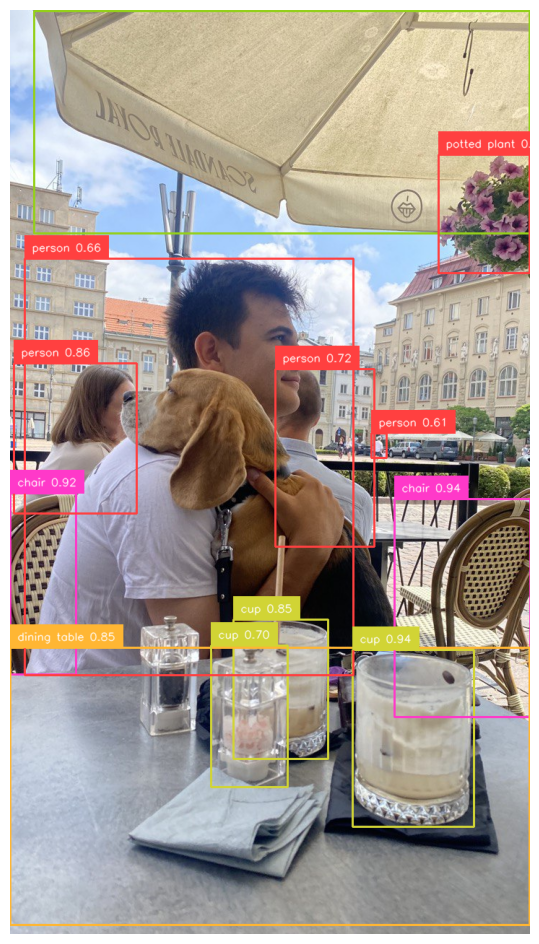

In [1]:
import io
import requests
import supervision as sv
from PIL import Image
from rfdetr import RFDETRBase
from rfdetr.util.coco_classes import COCO_CLASSES

model = RFDETRBase()

model.optimize_for_inference()

url = "https://media.roboflow.com/notebooks/examples/dog-2.jpeg"

image = Image.open(io.BytesIO(requests.get(url).content))
detections = model.predict(image, threshold=0.5)

labels = [
    f"{COCO_CLASSES[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections, labels)

sv.plot_image(annotated_image)